<h1 style="text-align:center;">Лабораторная работа №3</h1>

<h3 style="text-align:center;">Осипов Алексей Б01-204</h3>

**Цель**: решить линейную краевую задачу

### Задача XI.9.5

Для вычисления периодического с периодом 1 решения уравнения:

$$
y'' - P^2(x)y = f(x),
$$

где $ P^2(x) > 0 $ и $ f(x) $ — заданные периодические функции, используется разностная схема:

$$
\begin{cases}
\frac{y_1 - 2y_0 + y_{N-1}}{h^2} - P^2(0)y_0 = f(0), \\
\frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(nh)y_n = f(nh), & n = 1, 2, ..., N-2, \\
\frac{y_0 - 2y_{N-1} + y_{N-2}}{h^2} - P^2(1 - h)y_{N-1} = f(1 - h),
\end{cases}
$$

где $ Nh = 1 $.


**Вычислить численное решение при** $ h = 0.005 $,  
в случае:

- $ P^2(x) = 10 + \sin(2\pi x) $
- $ f(x) = \cos(2\pi x) $


### Метод прогонки для задачи с периодическим условием

Рассматривается задача численного решения уравнения:

$$
y''(x) - P^2(x)y(x) = f(x), \quad x \in [0, 1], \quad y(0) = y(1),
$$

где $P^2(x)$, $f(x)$ — периодические функции.  
Интервал разбивается равномерной сеткой шагом \(h\), \(N = \frac{1}{h}\).

### Разностная схема

Используется центральная аппроксимация:

$$
\frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(x_n)y_n = f(x_n),
$$

что приводит к виду:

$$
a_n y_{n-1} - b_n y_n + c_n y_{n+1} = \varphi_n,
$$

где:

- $ a_n = \frac{1}{h^2} $
- $ b_n = \frac{2}{h^2} + P^2(x_n) $
- $ c_n = \frac{1}{h^2} $
- $ \varphi_n = f(x_n) $


### Циклическая прогонка

Так как $ y_0 = y_N $, система становится почти трёхдиагональной.  
Используется модифицированный метод прогонки:

**Прямая прогонка:**
$$
\alpha_{n+1} = \frac{c_n}{b_n - a_n \alpha_n}, \quad
\beta_{n+1} = \frac{\varphi_n + a_n \beta_n}{b_n - a_n \alpha_n}
$$

**Закрытие системы (последнее уравнение):**
$$
y_{N-1} = \alpha_N y_0 + \beta_N
$$

Подставляется в замыкающее уравнение и получается:
$$
y_0 = \frac{\nu}{1 - \mu},
$$

где:
$$
\mu = \frac{a_{N-1} \alpha_{N-1} + c_{N-1}}{b_{N-1} - a_{N-1} \alpha_{N-1}}, \quad
\nu = \frac{\varphi_{N-1} + a_{N-1} \beta_{N-1}}{b_{N-1} - a_{N-1} \alpha_{N-1}}
$$

**Обратный ход:**
$$
y_n = \alpha_n y_0 + \beta_n
$$

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

C:\Users\osale\AppData\Local\Temp\ipykernel_5204\4180058636.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


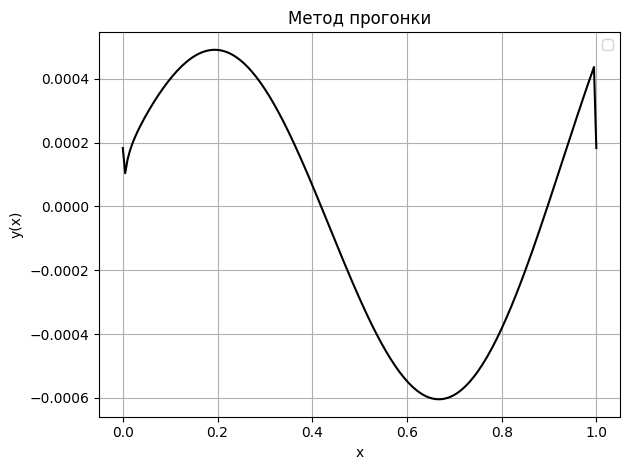

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Параметры
h = 0.005
N = int(1 / h)
x = np.linspace(0, 1, N, endpoint=False)

# Условие
P2 = 10 + np.sin(2 * pi * x)
f = np.cos(2 * pi * x)

# Коэффициенты
a = np.ones(N) / h**2
c = np.ones(N) / h**2
b = 2 / h**2 + P2
d = f

# Прямая прогонка
alpha = np.zeros(N)
beta = np.zeros(N)

alpha[1] = c[0] / b[0]
beta[1] = d[0] / b[0]

for i in range(1, N - 1):
    denom = b[i] - a[i] * alpha[i]
    alpha[i + 1] = c[i] / denom
    beta[i + 1] = (d[i] + a[i] * beta[i]) / denom

# Вводим вспомогательные коэффициенты для последнего уравнения
aN = a[-1]
bN = b[-1]
cN = c[-1]
dN = d[-1]

mu = -(aN * alpha[-2] + bN * alpha[-1] + cN)
nu = aN * beta[-2] + bN * beta[-1] - dN

y = np.zeros(N + 1)
y[0] = nu / (1 - mu)

# Обратный ход
for i in range(1, N):
    y[i] = alpha[i] * y[0] + beta[i]

y[N] = y[0]  # Периодическое условие

# График
x_full = np.linspace(0, 1, N + 1)
plt.plot(x_full, y, color='black')
plt.title("Метод прогонки")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Я долго пытался выснить, почему решение имеет выбросы на границах. Насколько я понял, это связано с тем, что во-первых, обычная прогонка предполагает известные значения на границах, а в периодической задаче значения $ y_0 $ и $ y_N $ взаимосвязаны, и последняя строка системы зависит от результата прямого хода, а во-вторых, метод использует приближённое выражение:
  $$
  y_{N-1} = \alpha_N y_0 + \beta_N
  $$
  и подставляет его в последнее уравнение, не решая его напрямую

Для сравнения я попробовал решить ту же задачу, только матричным методом

C:\Users\osale\AppData\Local\Temp\ipykernel_5204\4251051007.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


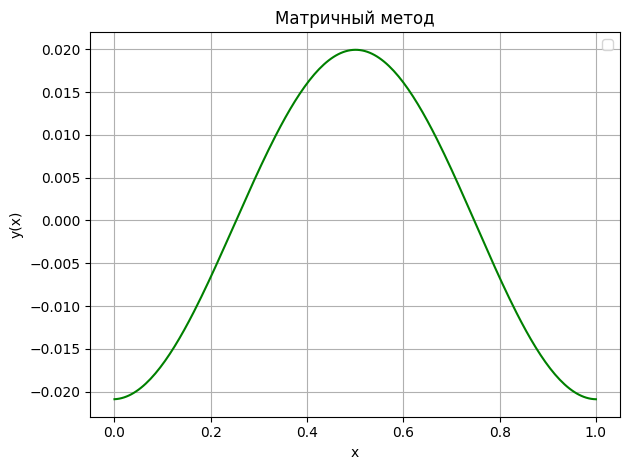

In [ ]:
# Параметры
h = 0.005
N = int(1 / h)
x = np.linspace(0, 1, N + 1)

# Функции
P2 = 10 + np.sin(2 * pi * x)
f = np.cos(2 * pi * x)

A = np.zeros((N + 1, N + 1))
rhs = np.zeros(N + 1)

for i in range(1, N):
    A[i, i - 1] = 1 / h**2
    A[i, i] = -2 / h**2 - P2[i]
    A[i, i + 1] = 1 / h**2
    rhs[i] = f[i]

# Периодичность
A[0, 0] = -2 / h**2 - P2[0]
A[0, 1] = 1 / h**2
A[0, N] = 1 / h**2
rhs[0] = f[0]

A[N, 0] = 1 / h**2
A[N, N - 1] = 1 / h**2
A[N, N] = -2 / h**2 - P2[N]
rhs[N] = f[N]

# Решение
y = np.linalg.solve(A, rhs)

# Построение графика
plt.plot(x, y, color='green')
plt.title("Матричный метод")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Как видно из графика, получилось точное решение без выбросов, но оно почему - то не совпадает с решением методом прогонки

Матричный метод строит полную систему уравнений и точно решает её, учитывая периодические связи, а метод прогонки требует модификации из-за периодичности границы. Это похоже на лабу из первого семестра на решения СЛАУ, когда аналитический метод Гаусса всегда точно решает системы уравнений, в отличие от приближённых методов (ну поэтому они так и называются :), зато тратит на это больше времени